In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
nifty = yf.Ticker("^NSEI")
nifty_data = nifty.history(period="max") # '1mo', '3mo', 'max
nifty_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0


In [6]:
nifty_data.shape

(4508, 7)

In [7]:
nifty_data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0


In [8]:
nifty_data.shape

(4508, 7)

<Axes: xlabel='Date'>

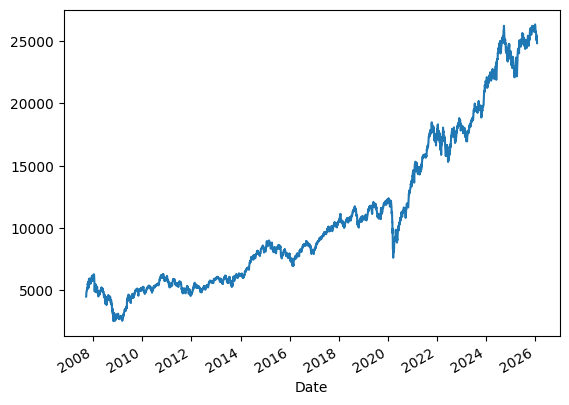

In [9]:
nifty_data["Close"].plot()

In [10]:
df = nifty_data
dates = df.index

cur_dated = []
for d in dates:
    cur_dated.append(str(d)[:10])

cur_dated = pd.Series(cur_dated)
df.index = cur_dated
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0


<Axes: >

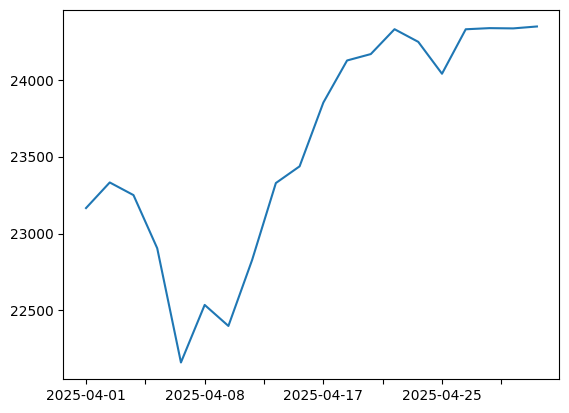

In [11]:
df["2025-04-01":"2025-05-02"]["Close"].plot()

In [12]:
df.to_excel("sampledata.xlsx",sheet_name="first")

In [13]:
pip install openpyexcel

Note: you may need to restart the kernel to use updated packages.


<Axes: >

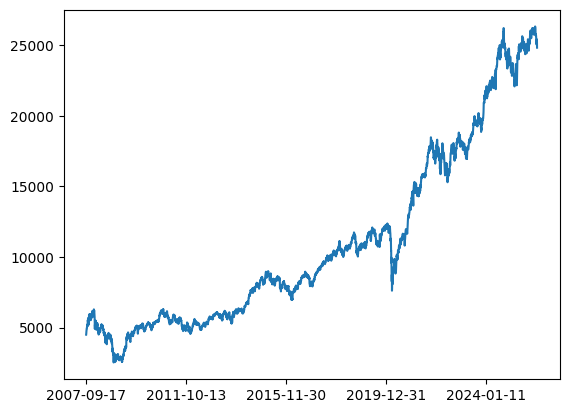

In [14]:
df["Close"].plot()

<Axes: >

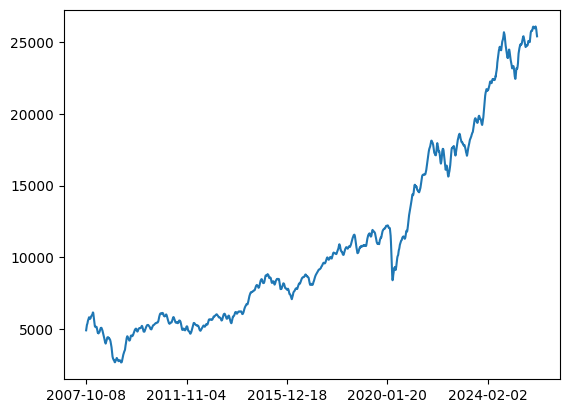

In [15]:
df["Close"].rolling(window=15).mean().dropna().plot()

In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
nifty_data["Close"]

2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2026-01-27    25175.400391
2026-01-28    25342.750000
2026-01-29    25418.900391
2026-01-30    25320.650391
2026-02-01    24825.449219
Name: Close, Length: 4508, dtype: float64

In [18]:
nifty_data.index = pd.to_datetime(nifty_data.index).strftime("%Y-%m")

In [19]:
nifty_data["months"] = pd.to_datetime(nifty_data.index).strftime("%Y-%m")

<Axes: xlabel='months'>

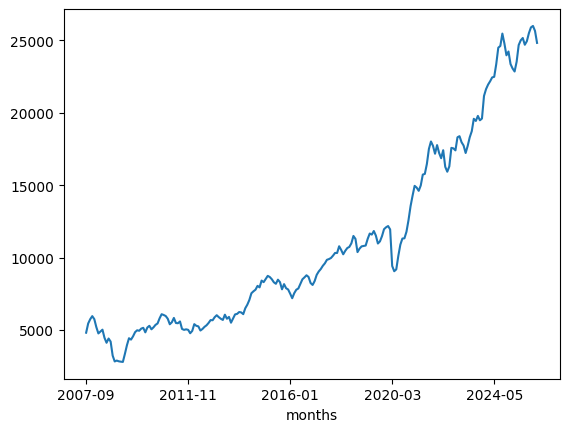

In [20]:
nifty_data["Close"].groupby(by=nifty_data["months"]).mean().plot()

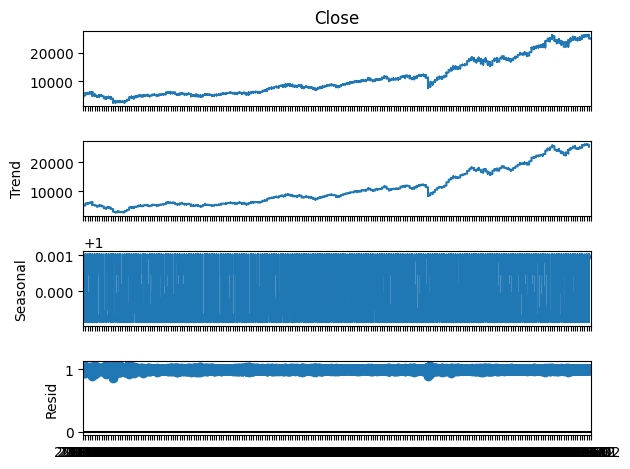

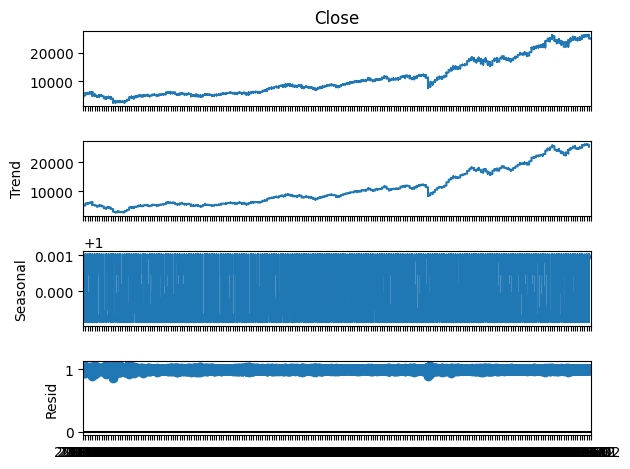

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(nifty_data["Close"],"multiplicative",period=12)
result.plot()

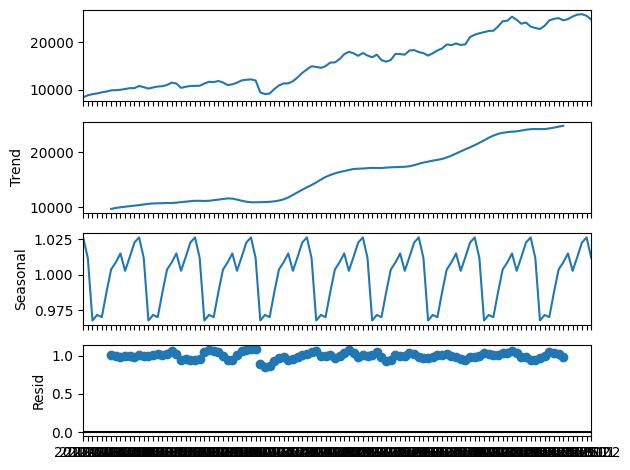

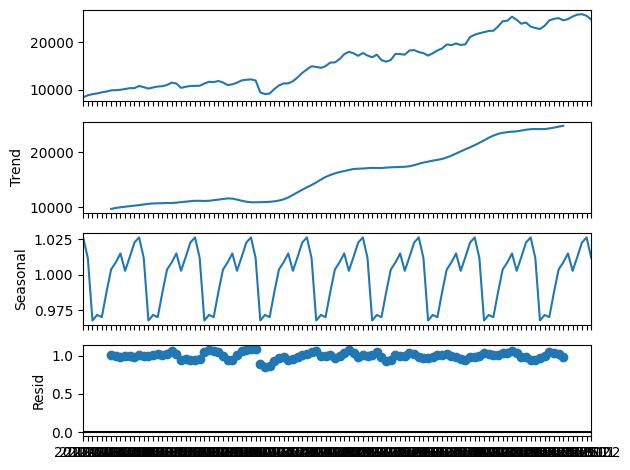

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.DataFrame()

df["Close"] = nifty_data["Close"].groupby(by=nifty_data["months"]).mean()
df.index = nifty_data["Close"].groupby(by=nifty_data["months"]).mean().index

result = seasonal_decompose(df["2017-01":"2026-12"],"multiplicative",period=12)
result.plot()

LSTM

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from keras.layers import Dense,Dropout,Input,BatchNormalization,Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [24]:
nifty = yf.Ticker('^NSEI')
nifty_data = nifty.history(period = 'max')

nifty_data.head()

df = nifty_data
df.index = df.index.strftime('%Y-%m-%d')

In [25]:

df = pd.DataFrame({
    'close': df['Close'],
    'nxt_close': df['Close'].shift(-1)
}).dropna()

In [26]:
# df.dropna(inplace = True)
df.head()

,close,nxt_close
Date,,
2007-09-17,4494.649902,4546.200195
2007-09-18,4546.200195,4732.350098
2007-09-19,4732.350098,4747.549805
2007-09-20,4747.549805,4837.549805
2007-09-21,4837.549805,4932.200195


In [27]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
df_scaled = pd.DataFrame(ms.fit_transform(df), columns = ['close', 'next_close'])


In [28]:
df_scaled.head()

,close,next_close
0,0.082777,0.084942
1,0.084942,0.092762
2,0.092762,0.093401
3,0.093401,0.097182
4,0.097182,0.101158


In [29]:

X = df_scaled[['close']].values      # input
y = df_scaled['next_close'].values   # target

In [30]:
X = X.reshape(X.shape[0], 1, 1)  # (samples, timesteps, features)


In [31]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [32]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(1, 1)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()


c:\Users\HIMANSHU\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:

model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0326 - val_loss: 0.1680
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0797
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0134
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8828e-04 - val_loss: 2.3823e-04
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8967e-05 - val_loss: 0.0020
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5070e-05 - val_loss: 0.0023
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3428e-05 - val_loss: 0.0022
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1847e-05 - val_loss: 0.0021
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0386e-05 - val_loss: 0.0020
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8996e-05 - val_loss: 0.0020
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7101e-05 - val_loss: 0.0016
Epoch 12/20
113/

In [34]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


0.9623683167007946

In [35]:

last_xtest = X_test[-1].reshape(1, 1, 1)
pred_scaled = model.predict(last_xtest)

dummy = np.zeros((1, 2))
dummy[0, 1] = pred_scaled[0, 0]

pred_price = ms.inverse_transform(dummy)[0, 1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [36]:
pred_price


np.float64(26148.444815774652)

In [37]:
df.tail()

,close,nxt_close
Date,,
2026-01-23,25048.650391,25175.400391
2026-01-27,25175.400391,25342.750000
2026-01-28,25342.750000,25418.900391
2026-01-29,25418.900391,25320.650391
2026-01-30,25320.650391,24825.449219
